## Welcome to the MedCare Wellness Research Center!
Our primary objective is to better understand the health and well-being of the senior population across diverse communities. the dataset used contains records of thousands of elderly individuals, detailing an array of health indicators and lifestyle factors. Our mission? To anticipate and predict health issues and concerns in our aging population, enhancing their life quality. Lets' journey through this data-driven exploration to enrich the lives of our senior community!

In [2]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

# Exploratory Data Analysis (EDA)
The initial step of our analysis is known as Exploratory Data Analysis (EDA) which is useful in order to gain a deeper understanding of our dataset. EDA holds a central position in the data analysis for understanding the data structure and meaning, detecting outliers, identifying patterns through plots and visualizations, data cleaning and integrity, and, mostly, to construct a solid foundation for what we will do next. It helps us in order to reduce the risk of mistakes and enabling more accurate predictions and insights!


In [3]:
# Read data
path = 'data/medcenter.csv'
medcenter_df = pd.read_csv(path)

In [4]:
# More to know about the medcare dataset

print("Relevant information of the dataset:"), (medcenter_df.info())
print("\nShape of the medcenter dataset:", medcenter_df.shape)

# Understanding columns meanings
medcenter_df.sample(10)


Relevant information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261311 entries, 0 to 261310
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Walking Difficulty        261311 non-null  object 
 1   Torsades de Pointes       261311 non-null  object 
 2   Skin Cancer               261311 non-null  object 
 3   Hours of sleep            261311 non-null  float64
 4   How do you Feel           261311 non-null  object 
 5   Asthma Status             261311 non-null  object 
 6   Do you Exercise           261311 non-null  object 
 7   Gender                    261311 non-null  object 
 8   Kidney Disease            261311 non-null  object 
 9   Is Smoking                261311 non-null  object 
 10  Ethnicity                 261311 non-null  object 
 11  Diabetes                  261311 non-null  object 
 12  How many Drinks per Week  261311 non-null  object 
 13  Age Gro

,Walking Difficulty,Torsades de Pointes,Skin Cancer,Hours of sleep,How do you Feel,Asthma Status,Do you Exercise,Gender,Kidney Disease,Is Smoking,Ethnicity,Diabetes,How many Drinks per Week,Age Group,Mental Health,Body Mass Index,Physical Health,History of Stroke,Patient ID
65438,Y,N,N,4.0,Poor,Y,Y,M,N,Y,White,Y,N,40-44,30.0,25.09,30.0,N,407550
148214,Y,N,N,8.0,Very good,N,N,F,N,Y,White,N,N,70-74,0.0,35.51,0.0,N,428522
149302,N,N,Y,7.0,Very good,N,Y,M,N,N,White,N,N,50-54,0.0,30.13,0.0,N,332903
49282,N,N,Y,8.0,Excellent,N,Y,M,N,Y,White,N,N,50-54,0.0,29.34,0.0,N,892665
157922,Y,N,N,10.0,Poor,N,N,M,Y,N,White,Y,N,65-69,0.0,23.01,30.0,Y,308534
140404,N,N,N,7.0,Very good,N,Y,M,N,N,White,N,N,18-24,0.0,23.24,0.0,N,182911
156175,N,N,N,7.0,Fair,N,Y,F,N,Y,Hispanic,N,N,55-59,3.0,20.05,0.0,N,441875
170635,N,N,N,7.0,Very good,N,Y,F,Y,N,White,N,N,45-49,0.0,27.46,0.0,N,713402
130396,N,N,Y,8.0,Good,N,Y,M,N,N,White,N,N,75-79,0.0,24.37,0.0,N,850787
200453,N,N,N,7.0,Good,N,Y,M,N,Y,White,N,N,65-69,0.0,37.97,0.0,N,240732


In [50]:
medcenter_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours of sleep,261311.0,7.099406,1.446752,1.00,6.00,7.00,8.00,24.00
Mental Health,261311.0,3.907199,7.969255,0.00,0.00,0.00,3.00,30.00
Body Mass Index,261311.0,28.355734,6.361975,12.02,24.03,27.35,31.47,94.85
Physical Health,261311.0,3.474951,8.079793,0.00,0.00,0.00,2.00,30.00
Patient ID,261311.0,549563.630153,259779.193866,100006.00,324810.50,549753.00,774317.50,999997.00


We see that there's a **vast majority** of categorical variables.

Our **continuous variables** are on similar scales so we don't need to impute or scale anything.

## Check data integrity

In [24]:
# check for missing values
missing_values = medcenter_df.isnull().sum() 
print('Missing values:\n',missing_values) 

Missing values:
 Walking Difficulty          0
Torsades de Pointes         0
Skin Cancer                 0
Hours of sleep              0
How do you Feel             0
Asthma Status               0
Do you Exercise             0
Gender                      0
Kidney Disease              0
Is Smoking                  0
Ethnicity                   0
Diabetes                    0
How many Drinks per Week    0
Age Group                   0
Mental Health               0
Body Mass Index             0
Physical Health             0
History of Stroke           0
Patient ID                  0
dtype: int64


In [32]:
# Since we are interested to predict the Physical Health of the elderly population, we restrict our data to patients that can be considered so.
# elderly_samples = medcenter_df.loc[medcenter_df['Age Group'].isin(['70-74', '75-79', '80 or older'])] 

## Visualizing the Data

Text(0.5, 0, 'BMI')

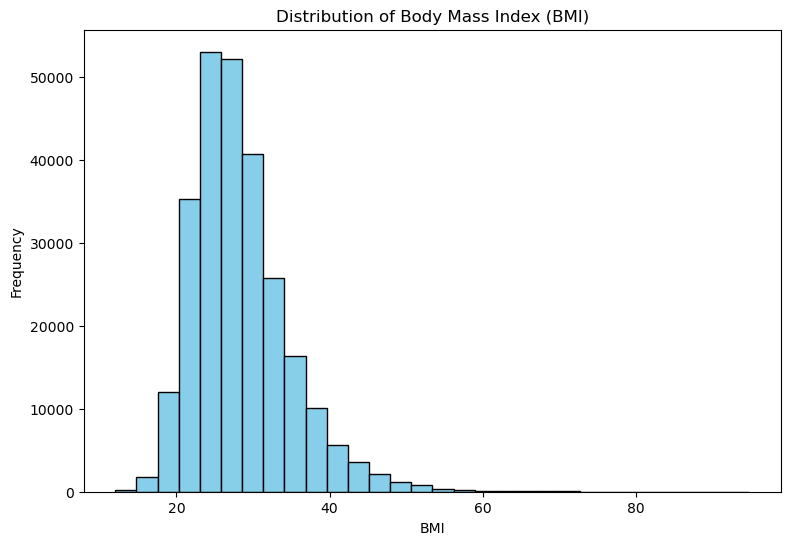

In [60]:
plt.figure(figsize=(9,6))
plt.title("Distribution of Body Mass Index (BMI)")
plt.hist(medcenter_df['Body Mass Index'], bins = 30, edgecolor = 'black', color = 'skyblue')
plt.ylabel("Frequency")
plt.xlabel("BMI")

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Good'),
  Text(1, 0, 'Fair'),
  Text(2, 0, 'Poor'),
  Text(3, 0, 'Excellent'),
  Text(4, 0, 'Very good')])

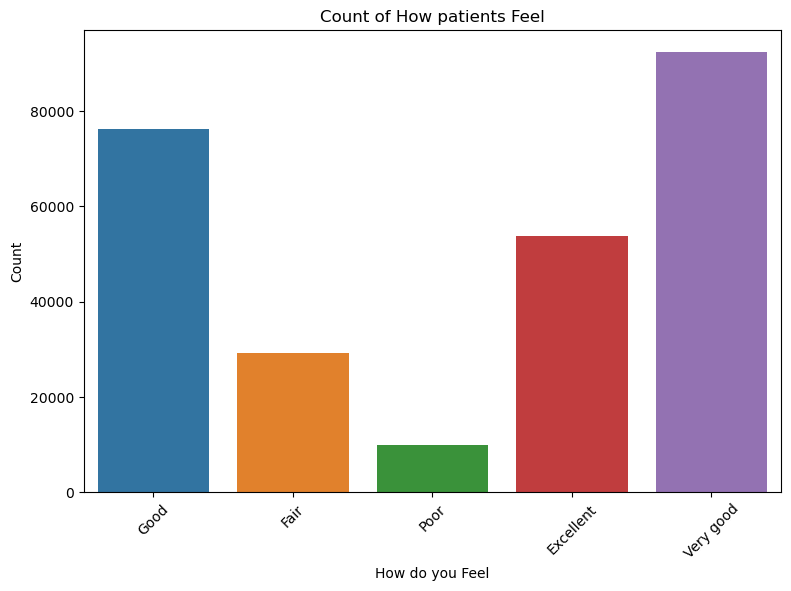

In [80]:
plt.figure(figsize=(9,6))
plt.title("Count of How patients Feel")
sns.countplot(data = medcenter_df, x = 'How do you Feel')
plt.ylabel("Count")
plt.xticks(rotation = 45)

<Axes: xlabel='How do you Feel', ylabel='Physical Health'>

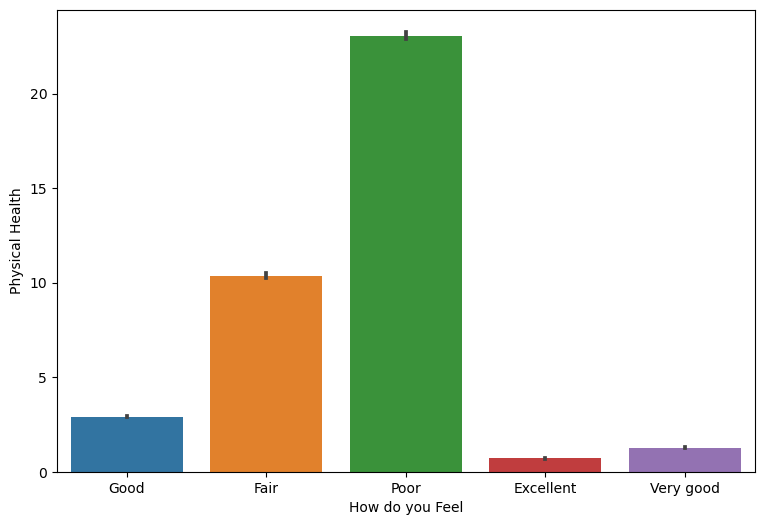

In [99]:
plt.figure(figsize=(9,6))
sns.barplot(data = medcenter_df, x = 'How do you Feel', y = 'Physical Health')

Text(0, 0.5, 'Count of Alcohol consumers')

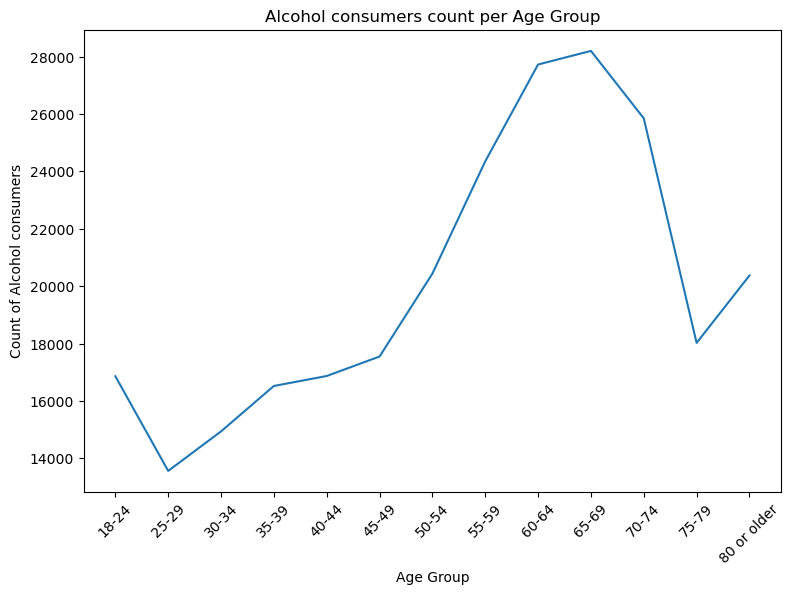

In [101]:
plt.figure(figsize=(9,6))
plt.title("Alcohol consumers count per Age Group")
alcohol_consumption_per_age_group = medcenter_df.groupby('Age Group')['How many Drinks per Week'].count()
sns.lineplot(data = alcohol_consumption_per_age_group)
plt.xticks(rotation = 45)
plt.ylabel("Count of Alcohol consumers")

Text(83.22222222222221, 0.5, 'Patient Feeling')

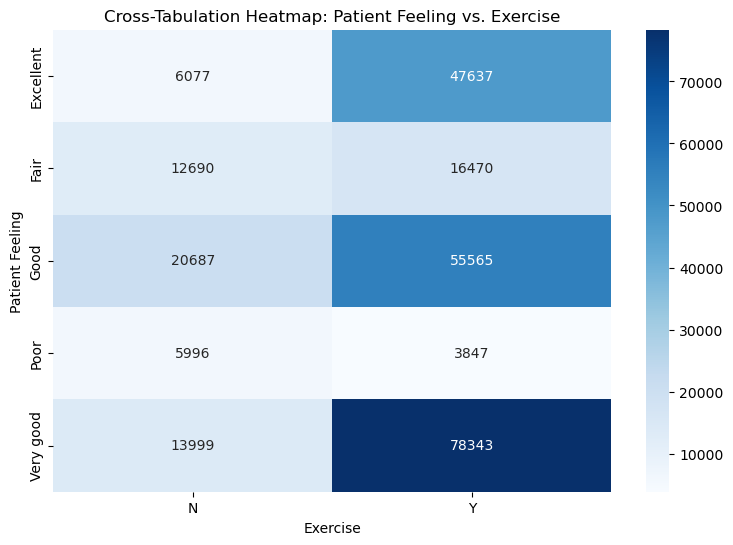

In [110]:
crosstab = pd.crosstab(medcenter_df['How do you Feel'], medcenter_df['Do you Exercise'])
plt.figure(figsize=(9, 6))
sns.heatmap(crosstab, annot=True, fmt='d', cmap = 'Blues')
plt.title('Cross-Tabulation Heatmap: Patient Feeling vs. Exercise')
plt.xlabel('Exercise')
plt.ylabel('Patient Feeling')